In [4]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb_double")
import drjit as dr
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from PDE2D.Coefficient import *
from PDE2D.utils import *
from PDE2D.BoundaryShape import *
from PDE2D.Solver import *
from PDE2D import GreenSampling, Split
import matplotlib.patches as patches

In [5]:
print(mi.TensorXf)

<class 'drjit.cuda.ad.TensorXf64'>


: 

In [15]:
green = GreenSampling.Polynomial
split = Split.Agressive

In [16]:

normalization = True
resolution = 128
conf_number = 0
fd_step = 5e-3
e_shell = 1e-5
computation_radius = 0.95
on_boundary = False
parameters = {}
parameters["freq"] = 1
parameters["bias"] = -4
parameters["scale"] = -4
res_sdf = 64

num_electrodes = 16
is_delta = False
electrode_length = 0.1
injection_confs=[[0,10], [0,5]]
conf_numbers = [UInt32(0), UInt32(1)]
conf_vis = 1

out_boundary_el = CircleWithElectrodes(radius = 1.0, num_electrodes=num_electrodes, is_delta = False, 
                                          electrode_length=electrode_length, injection_confs=injection_confs,centered = True)

out_boundary_delta = CircleWithElectrodes(radius = 1.0, num_electrodes=num_electrodes, is_delta = True, 
                                         electrode_length=electrode_length, injection_confs=injection_confs,centered = True)

out_neumann = out_boundary_el.create_neumann_function(conf_numbers)
out_boundary_naive = CircleShape(origin =Point2f(0.0, 0.0), radius = 1.0, name = "out-boundary", 
                                 neumann = out_neumann, dirichlet_map = np.array([False]), epsilon = e_shell)


origin_object1 = np.array([0.2, 0.1])
radius_object1 = 0.2
object_potential1 = [-3, 5]

origin_object2 = np.array([-0.2, -0.3])
radius_object2 = 0.1
object_potential2 = [4, 1]

in_boundary1 = CircleShape(origin =Point2f(origin_object1), radius = radius_object1, name = "in-boundary", epsilon=e_shell)
in_boundary2 = CircleShape(origin =Point2f(origin_object2), radius = radius_object2, name = "in-boundary", epsilon=e_shell)

in_boundaries = [in_boundary1, in_boundary2]


shape_el = BoundaryWithDirichlets(out_boundary_el, in_boundaries, dirichlet_values= [object_potential1, object_potential2])
shape_delta = BoundaryWithDirichlets(out_boundary_delta, in_boundaries, dirichlet_values= [object_potential1, object_potential2])
shape_naive = BoundaryWithDirichlets(out_boundary_naive, in_boundaries, dirichlet_values= [object_potential1, object_potential2])

out_val = 0.1
image = np.array([[0,1,2,3,4],
                  [0,1,2,3,4],
                  [0,1,2,3,4],
                  [0,1,2,3,4],
                  [0,1,2,3,4]], dtype = np.float64)
image *= 2
image += out_val
α = DiskTextureCoefficient("diffusion", image, radius = 1, constant_thickness= 1-computation_radius, origin = [0,0], out_val = out_val)

data_holder_el = DataHolder(shape_el, α  = α)
data_holder_delta = DataHolder(shape_delta, α = α)
data_holder_naive = DataHolder(shape_naive, α = α)

In [17]:
bbox = [[-1.1,-1.1],[1.1,1.1]]
resolution_image = [256, 256]
spp_image = 256
points = create_image_points(bbox, resolution_image, spp_image)
wos_naive = WostVariable(data_holder_naive, green_sampling=green)
wos_delta = WostVariable(data_holder_delta, green_sampling=green)
wos_el = WostVariable(data_holder_el, green_sampling = green)

Text(0.5, 0.98, 'Inputs with Diffusion Coeffs.')

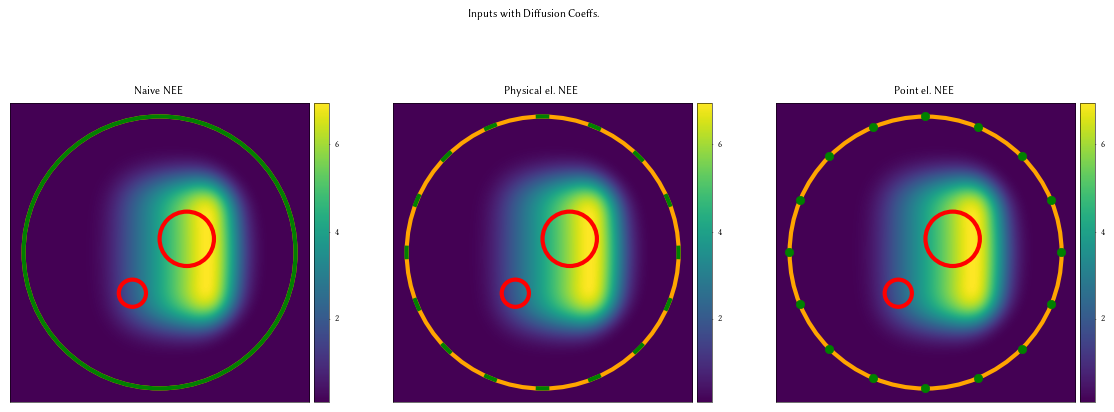

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 5])
α.visualize(ax1, bbox, resolution = [1024,1024])
α.visualize(ax2, bbox, resolution = [1024,1024])
α.visualize(ax3, bbox, resolution = [1024,1024])
shape_naive.sketch(ax1, bbox, resolution = [1024,1024]);
shape_el.sketch(ax2, bbox, resolution = [1024, 1024]);
shape_delta.sketch(ax3, bbox, resolution = [1024, 1024]);
ax1.set_title("Naive NEE")
ax2.set_title("Physical el. NEE")
ax3.set_title("Point el. NEE")
fig.suptitle("Inputs with Diffusion Coeffs.")

0 : 16777216 -> 4997262
1 : 4997262 -> 2855855
2 : 2855855 -> 1322188
3 : 1322188 -> 594910
4 : 594910 -> 280986
5 : 280986 -> 136671
6 : 136671 -> 68136
7 : 68136 -> 34765
8 : 34765 -> 17519
9 : 17519 -> 9024
10 : 9024 -> 4541
11 : 4541 -> 2332
12 : 2332 -> 1198
13 : 1198 -> 628
14 : 628 -> 349
15 : 349 -> 215
16 : 215 -> 124
17 : 124 -> 79
18 : 79 -> 45
19 : 45 -> 15
20 : 15 -> 9
21 : 9 -> 7
22 : 7 -> 1
23 : 1 -> 2
24 : 2 -> 0
0 : 16777216 -> 5000285
1 : 5000285 -> 2854896
2 : 2854896 -> 1318508
3 : 1318508 -> 594479
4 : 594479 -> 280762
5 : 280762 -> 136563
6 : 136563 -> 67583
7 : 67583 -> 34147
8 : 34147 -> 17294
9 : 17294 -> 8990
10 : 8990 -> 4725
11 : 4725 -> 2503
12 : 2503 -> 1378
13 : 1378 -> 705
14 : 705 -> 345
15 : 345 -> 177
16 : 177 -> 96
17 : 96 -> 52
18 : 52 -> 26
19 : 26 -> 22
20 : 22 -> 15
21 : 15 -> 7
22 : 7 -> 0
0 : 16777216 -> 5001093
1 : 5001093 -> 2855674
2 : 2855674 -> 1323425
3 : 1323425 -> 596918
4 : 596918 -> 281767
5 : 281767 -> 135591
6 : 135591 -> 67345
7 : 

Text(0.5, 1.0, 'Point el. NEE')

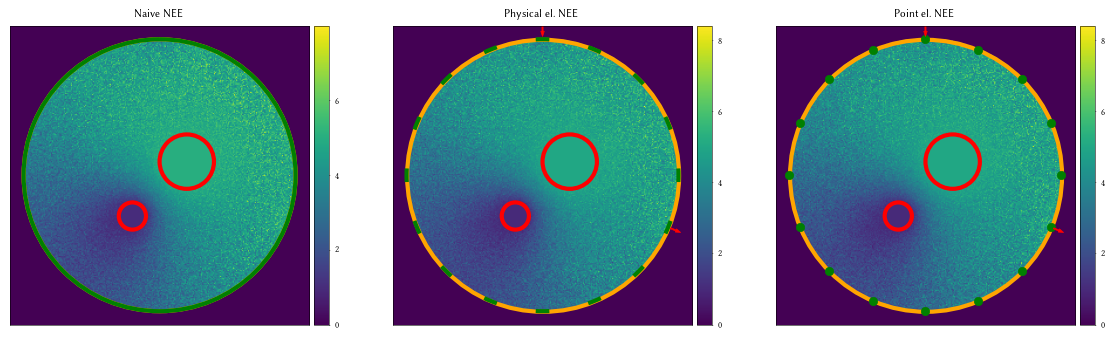

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 5])
L_naive, _ = wos_naive.solve(points_in = points, split = split, conf_numbers = conf_numbers)
L_el, _ = wos_el.solve(points_in = points, conf_numbers = conf_numbers, split = split)
L_delta, _ = wos_delta.solve(points_in = points, conf_numbers = conf_numbers, split = split)
image_naive, tensor = create_image_from_result(L_naive, resolution_image)
image_el, tensor = create_image_from_result(L_el, resolution_image)
image_delta, tensor = create_image_from_result(L_delta, resolution_image)

plot_image(image_naive[conf_vis], ax1)
plot_image(image_el[conf_vis], ax2)
plot_image(image_delta[conf_vis], ax3)
shape_naive.sketch(ax1, bbox, resolution_image)
shape_el.sketch(ax2, bbox, resolution_image)
shape_el.out_boundary.sketch_electrode_input(ax2, bbox, resolution_image, conf_number = conf_vis)
shape_delta.sketch(ax3, bbox, resolution_image)
shape_delta.out_boundary.sketch_electrode_input(ax3, bbox, resolution_image, conf_number = conf_vis)
ax1.set_title("Naive NEE")
ax2.set_title("Physical el. NEE")
ax3.set_title("Point el. NEE")

In [7]:
print(data_holder_naive.NEE)
print(data_holder_el.NEE)
print(data_holder_delta.NEE)

NEE.Normal
NEE.Special
NEE.Special


Mean:
-0.00083268917
Variance:
0.34056032


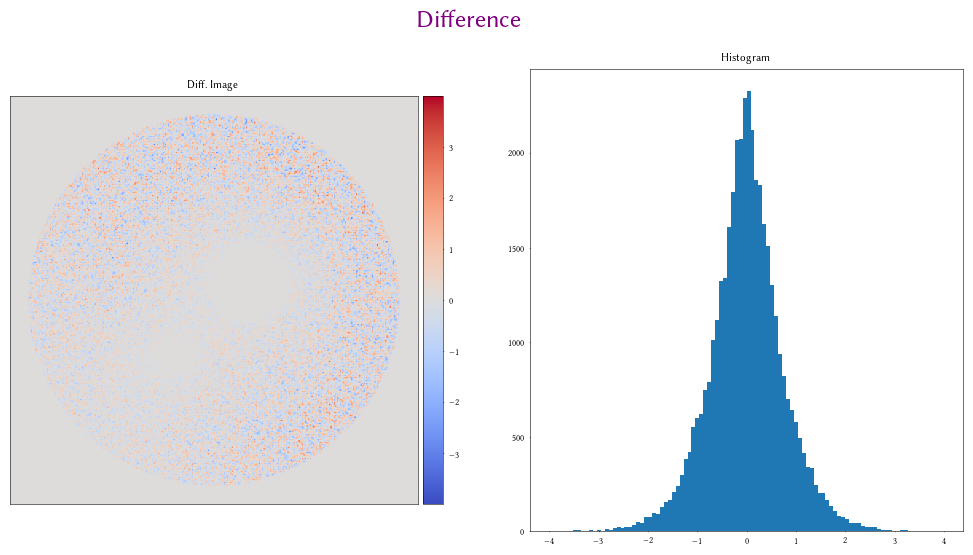

In [8]:
sketch_diff(image_naive[conf_vis], image_el[conf_vis], max_range = 10)

Mean:
-0.0007516836
Variance:
0.13323663


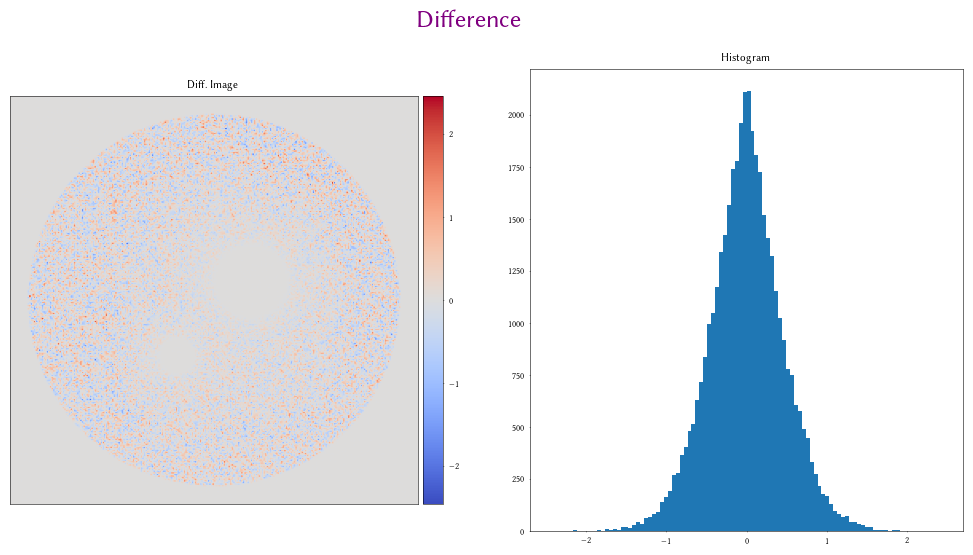

In [9]:
sketch_diff(image_el[0], image_delta[0], max_range = 10)

In [10]:
spe = 2 ** 20
points_el_naive, active_confs_naive, electrode_nums_naive = wos_el.input.shape.out_boundary.create_electrode_points(spe = spe, conf_numbers = conf_numbers)
points_el, active_confs, electrode_nums = wos_el.input.shape.out_boundary.create_electrode_points(spe = spe, conf_numbers = conf_numbers)

L_naive, _ = wos_naive.solve(points_in = points_el, active_conf_in = active_confs_naive, conf_numbers = conf_numbers, all_inside = True, split = split)
L_el, _= wos_el.solve(points_in = points_el, active_conf_in = active_confs, conf_numbers = conf_numbers, all_inside = True, split = split)
L_delta, _ = wos_delta.solve(points_in = points_el, active_conf_in = active_confs, conf_numbers = conf_numbers, all_inside = True, split = split)

normalization = True
el_naive = create_electrode_result(L_naive, spe, electrode_nums, apply_normalization = normalization)
el_el = create_electrode_result(L_el, spe, electrode_nums, apply_normalization = normalization)
el_delta = create_electrode_result(L_delta, spe, electrode_nums, apply_normalization = normalization)


0 : 16777216 -> 9903085
1 : 9903085 -> 6560876
2 : 6560876 -> 3221941
3 : 3221941 -> 1452016
4 : 1452016 -> 685176
5 : 685176 -> 332708
6 : 332708 -> 164134
7 : 164134 -> 82521
8 : 82521 -> 41999
9 : 41999 -> 21518
10 : 21518 -> 11080
11 : 11080 -> 5873
12 : 5873 -> 2948
13 : 2948 -> 1536
14 : 1536 -> 857
15 : 857 -> 456
16 : 456 -> 259
17 : 259 -> 146
18 : 146 -> 79
19 : 79 -> 44
20 : 44 -> 25
21 : 25 -> 4
22 : 4 -> 2
23 : 2 -> 1
24 : 1 -> 0
0 : 16777216 -> 9904356
1 : 9904356 -> 6573257
2 : 6573257 -> 3226326
3 : 3226326 -> 1455205
4 : 1455205 -> 685365
5 : 685365 -> 331465
6 : 331465 -> 163953
7 : 163953 -> 82018
8 : 82018 -> 41593
9 : 41593 -> 21399
10 : 21399 -> 11252
11 : 11252 -> 5849
12 : 5849 -> 3180
13 : 3180 -> 1644
14 : 1644 -> 917
15 : 917 -> 503
16 : 503 -> 235
17 : 235 -> 120
18 : 120 -> 46
19 : 46 -> 18
20 : 18 -> 8
21 : 8 -> 4
22 : 4 -> 6
23 : 6 -> 5
24 : 5 -> 2
25 : 2 -> 1
26 : 1 -> 1
27 : 1 -> 1
28 : 1 -> 1
29 : 1 -> 0
0 : 16777216 -> 9901573
1 : 9901573 -> 6569319
2

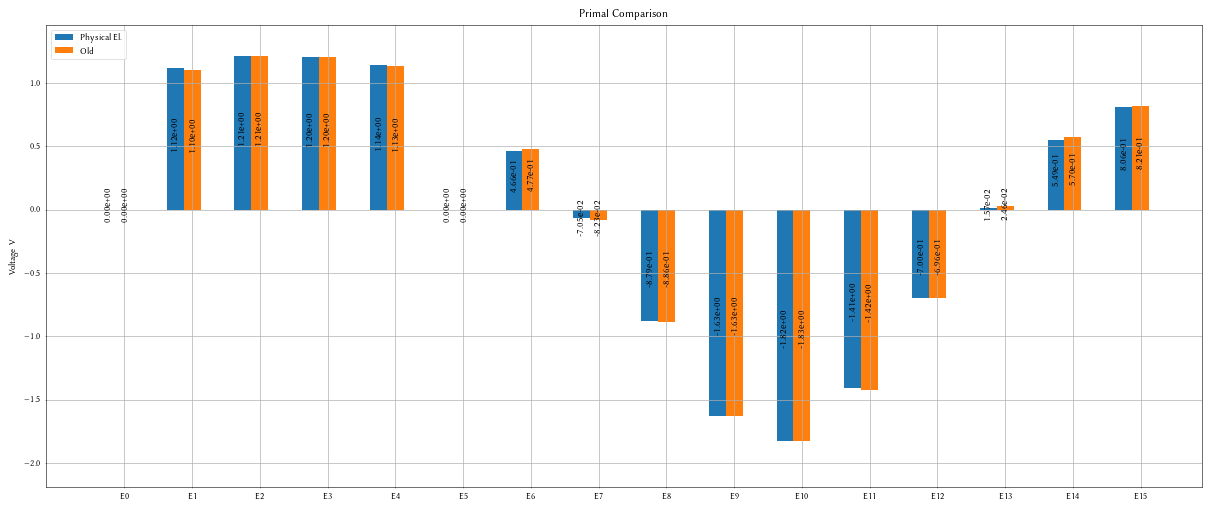

In [11]:
fig, ax = plt.subplots(layout='constrained', figsize = (12,5))
plot_primals(ax, el_naive[conf_vis], el_el[conf_vis], electrode_nums, num_electrodes, name1 = "Old", name2 = "Physical El.")

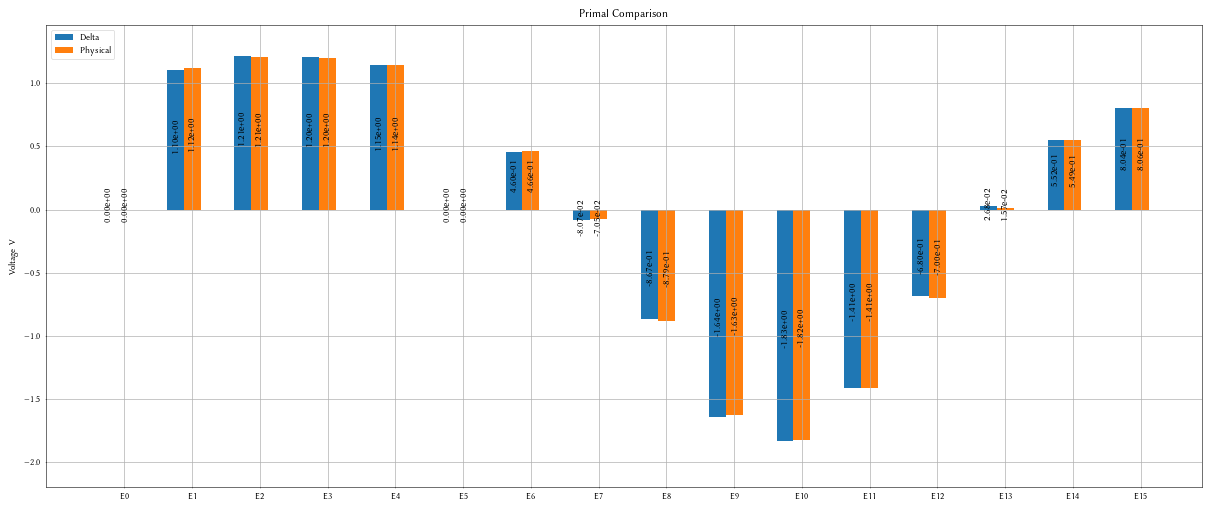

In [12]:
fig, ax = plt.subplots(layout='constrained', figsize = (12,5))
plot_primals(ax, el_el[conf_vis], el_delta[conf_vis], electrode_nums, num_electrodes, name1 = "Physical", name2 = "Delta")

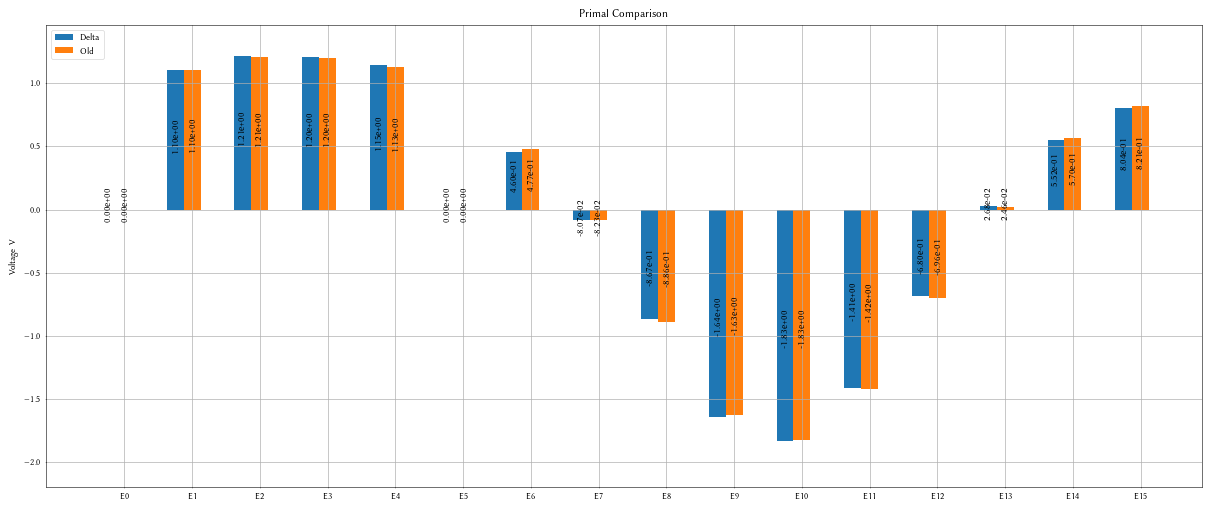

In [13]:
fig, ax = plt.subplots(layout='constrained', figsize = (12,5))
plot_primals(ax, el_naive[conf_vis], el_delta[conf_vis], electrode_nums, num_electrodes, name1 = "Old", name2 = "Delta")